# Importing neccessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Displaying Uninfected and Infected Cell tissues

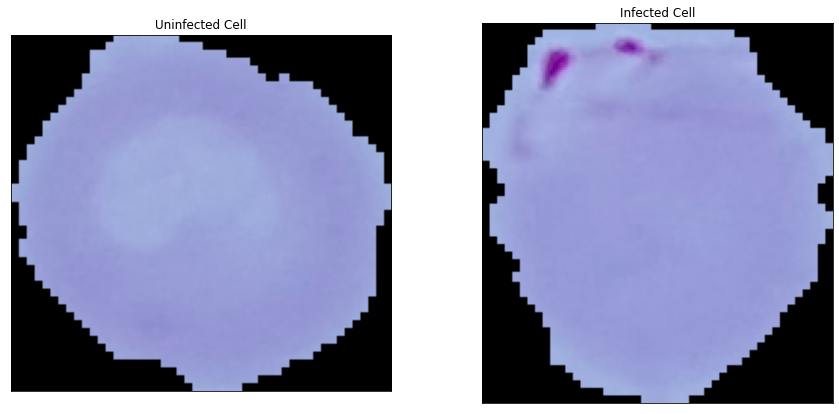

In [3]:
import cv2

upic='../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [4]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [6]:
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation',
                                           shuffle=False)

Found 5510 images belonging to 2 classes.


# Preparing the model

In [8]:

from tensorflow import keras
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [128,128,3], padding='same'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(1, activation ='sigmoid')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 32, 32, 64)        2400      
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 32, 32, 64)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        2

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
callbacks = [early_stopping, reduce_lr]

In [12]:
history = model.fit(trainDatagen,
                    epochs =50,
                    validation_data = valDatagen,
                    callbacks=callbacks, 
                    batch_size=128)

Epoch 1/50
1378/1378 [==============================] - 47s 34ms/step - loss: 0.4851 - accuracy: 0.7563 - val_loss: 1.1580 - val_accuracy: 0.5022 - lr: 0.0010
Epoch 2/50
1378/1378 [==============================] - 46s 33ms/step - loss: 0.1943 - accuracy: 0.9411 - val_loss: 0.1816 - val_accuracy: 0.9452 - lr: 0.0010
Epoch 3/50
1378/1378 [==============================] - 46s 34ms/step - loss: 0.1857 - accuracy: 0.9453 - val_loss: 0.1720 - val_accuracy: 0.9470 - lr: 0.0010
Epoch 4/50
1378/1378 [==============================] - 46s 34ms/step - loss: 0.1738 - accuracy: 0.9486 - val_loss: 0.1695 - val_accuracy: 0.9508 - lr: 0.0010
Epoch 5/50
1378/1378 [==============================] - 46s 33ms/step - loss: 0.1719 - accuracy: 0.9499 - val_loss: 0.1500 - val_accuracy: 0.9388 - lr: 0.0010
Epoch 6/50
1378/1378 [==============================] - 46s 33ms/step - loss: 0.1619 - accuracy: 0.9524 - val_loss: 0.1941 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 7/50
1378/1378 [========================

In [31]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

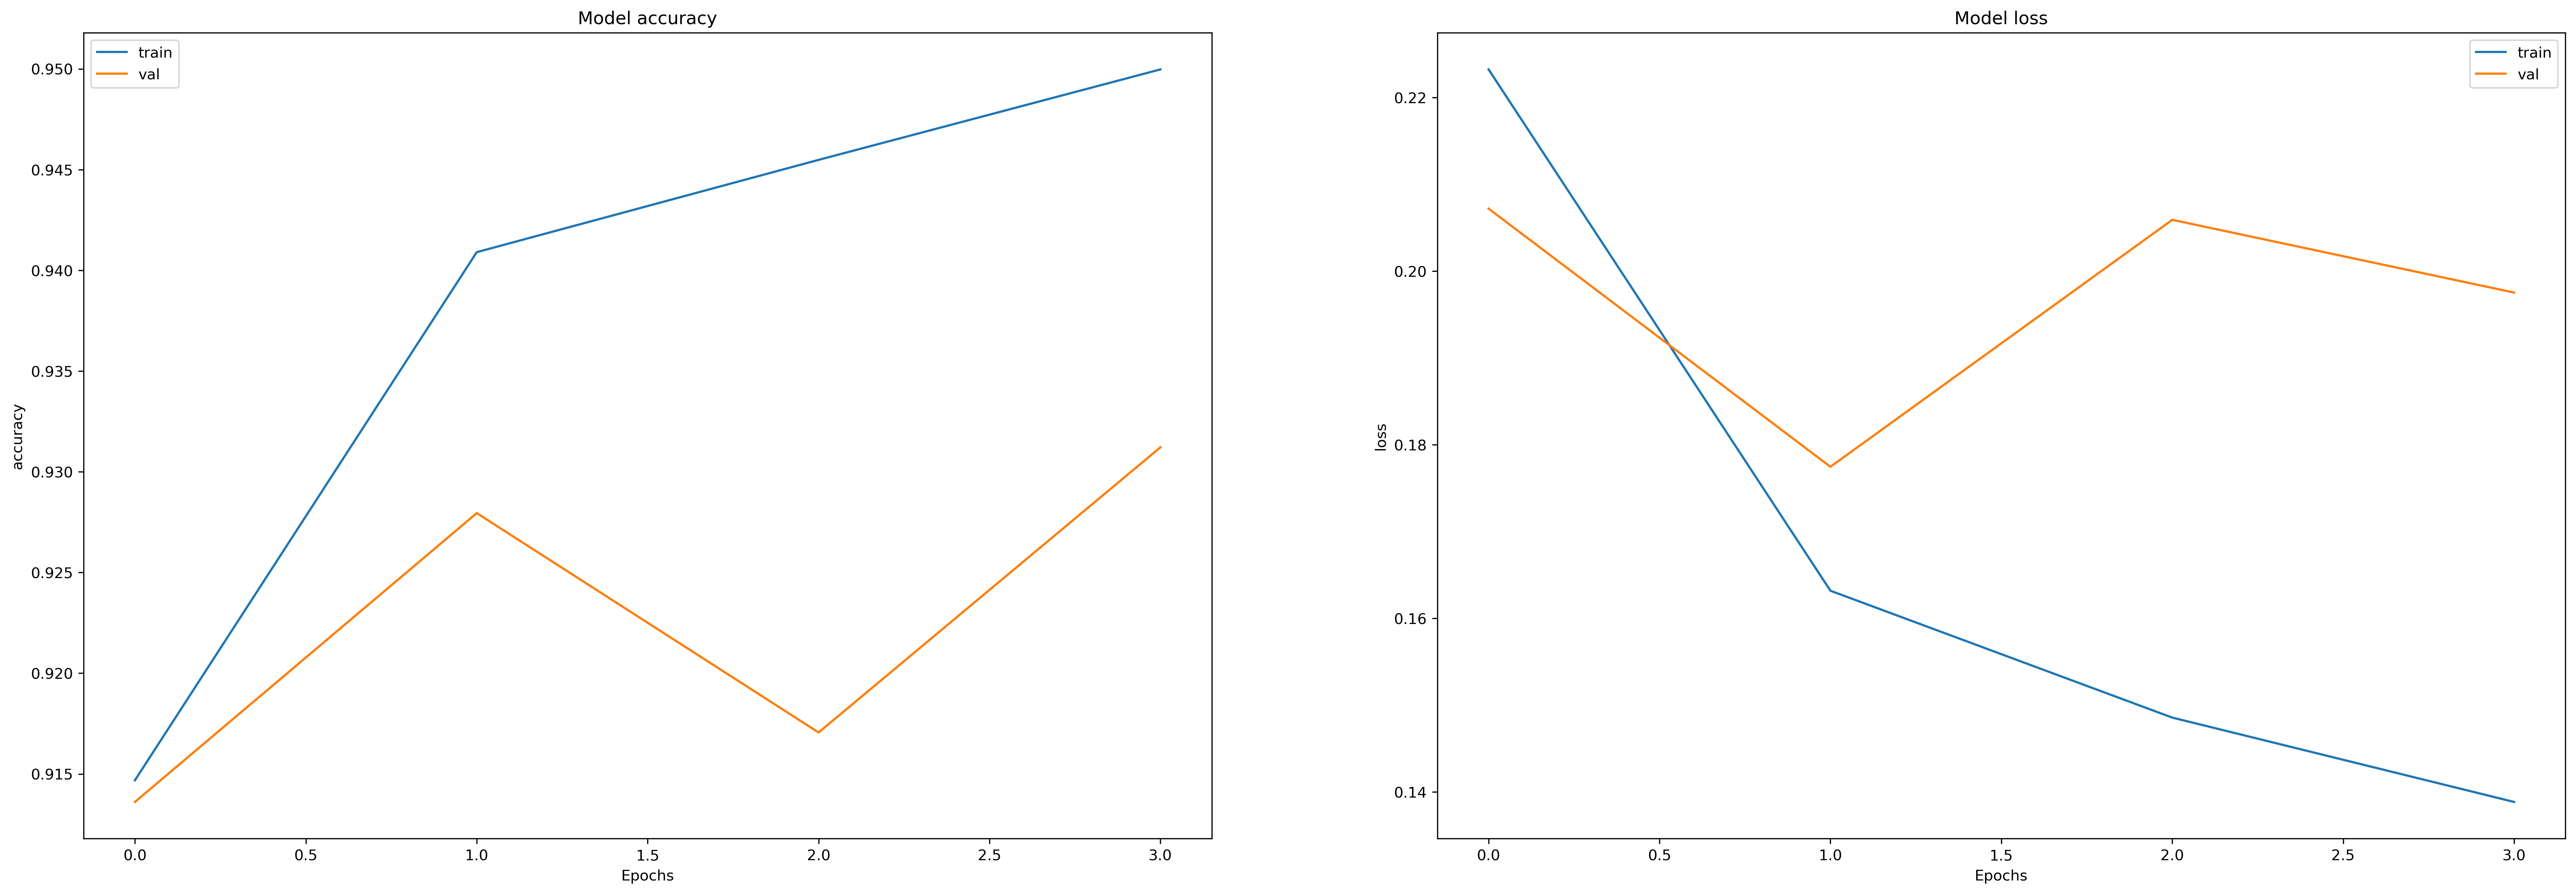

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [14]:
model.evaluate(valDatagen)

345/345 [==============================] - 9s 26ms/step - loss: 0.1903 - accuracy: 0.9485


[0.19034384191036224, 0.9484573602676392]

In [15]:
# df = pd.DataFrame(history.history)
# df.to_csv("Malaria-CNN.csv")

In [67]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
preds = model.predict_generator(valDatagen)
y_pred = tf.where(preds<=0.5,0,1)
y_true = valDatagen.labels
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2755
           1       0.93      0.97      0.95      2755

    accuracy                           0.95      5510
   macro avg       0.95      0.95      0.95      5510
weighted avg       0.95      0.95      0.95      5510



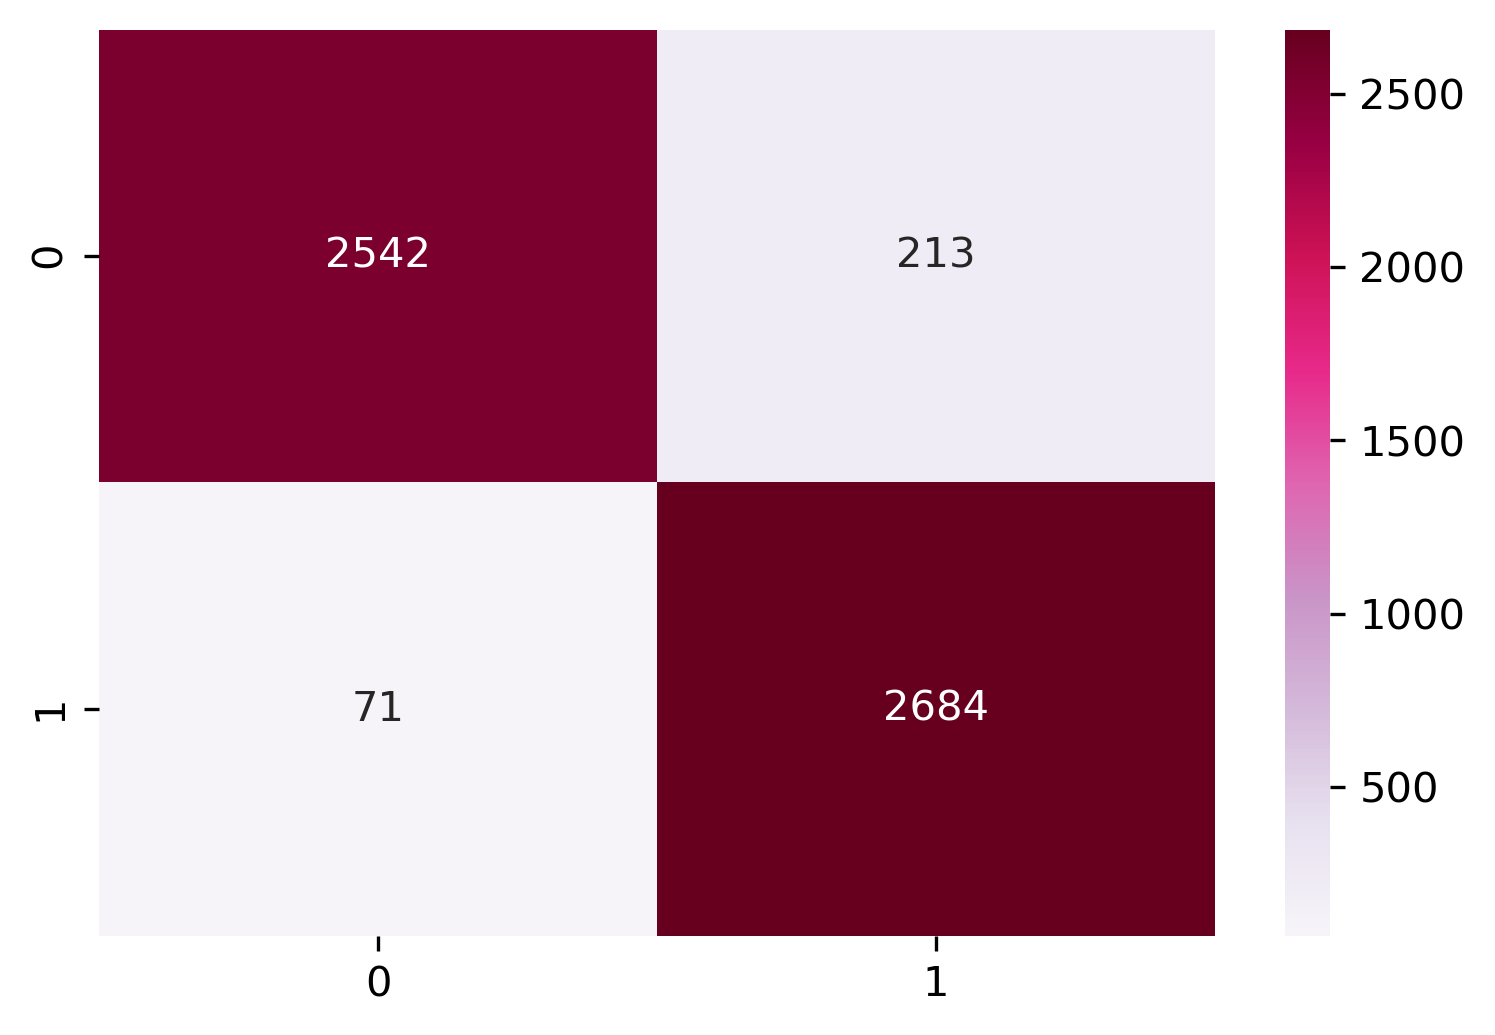

In [68]:
import seaborn as sns
cnf = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf, annot=True,fmt='g', cmap="PuRd")
plt.savefig("CNN-Confusion matrix.png")
plt.show()

# Specificity and sensitivity of CNN

In [70]:
tp = 2542
fp = 213
tn = 2684 
fn = 71
sensitivity = tp/(tp+fn)
print(sensitivity)
specificity = tn/(tn+fp)
print(specificity)

0.9728281668580177
0.9264756644804971


# VGG16 Model

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [18]:
vgg = VGG16(input_shape=(128,128,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

In [19]:
prediction = Dense(1, activation='sigmoid')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [20]:
METRICS = ['accuracy']

In [21]:
modelvgg.compile(optimizer='adam',
              loss=['binary_crossentropy'],
              metrics=METRICS)

In [22]:
history = modelvgg.fit(trainDatagen,
                    epochs =50,
                    validation_data = valDatagen,
                    callbacks=callbacks, 
                    batch_size=128)

Epoch 1/50
1378/1378 [==============================] - 48s 35ms/step - loss: 0.2232 - accuracy: 0.9147 - val_loss: 0.2072 - val_accuracy: 0.9136 - lr: 0.0010
Epoch 2/50
1378/1378 [==============================] - 48s 34ms/step - loss: 0.1632 - accuracy: 0.9409 - val_loss: 0.1775 - val_accuracy: 0.9279 - lr: 0.0010
Epoch 3/50
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1486 - accuracy: 0.9455 - val_loss: 0.2059 - val_accuracy: 0.9171 - lr: 0.0010
Epoch 4/50
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1389 - accuracy: 0.9500 - val_loss: 0.1975 - val_accuracy: 0.9312 - lr: 0.0010


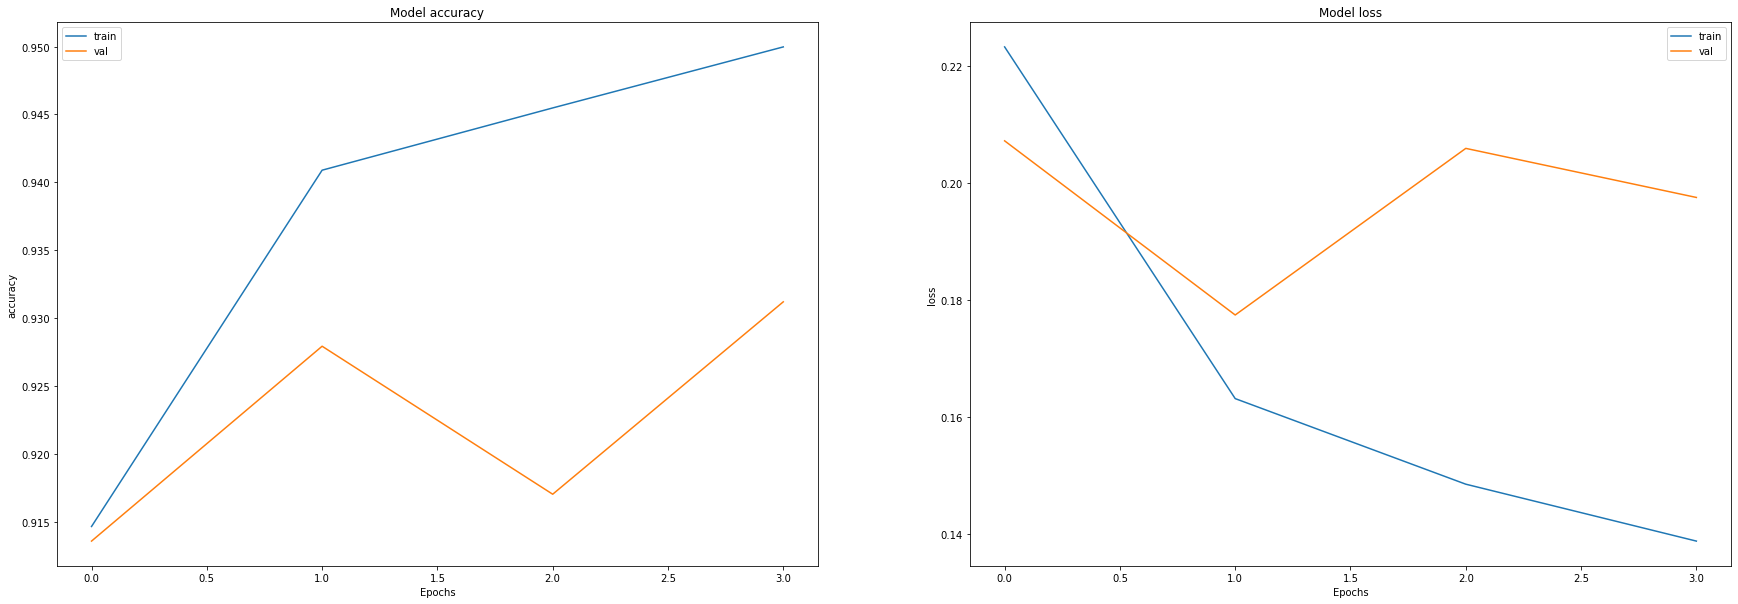

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [24]:
modelvgg.evaluate_generator(valDatagen)

[0.1975327879190445, 0.9312159419059753]

In [25]:
df = pd.DataFrame(history.history)

In [26]:
# df.to_csv("Malaria-VGG.csv")

# Perfromance

In [71]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
preds = modelvgg.predict_generator(valDatagen)
y_pred = tf.where(preds<=0.5,0,1)


In [72]:
y_true = valDatagen.labels
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2755
           1       0.95      0.91      0.93      2755

    accuracy                           0.93      5510
   macro avg       0.93      0.93      0.93      5510
weighted avg       0.93      0.93      0.93      5510



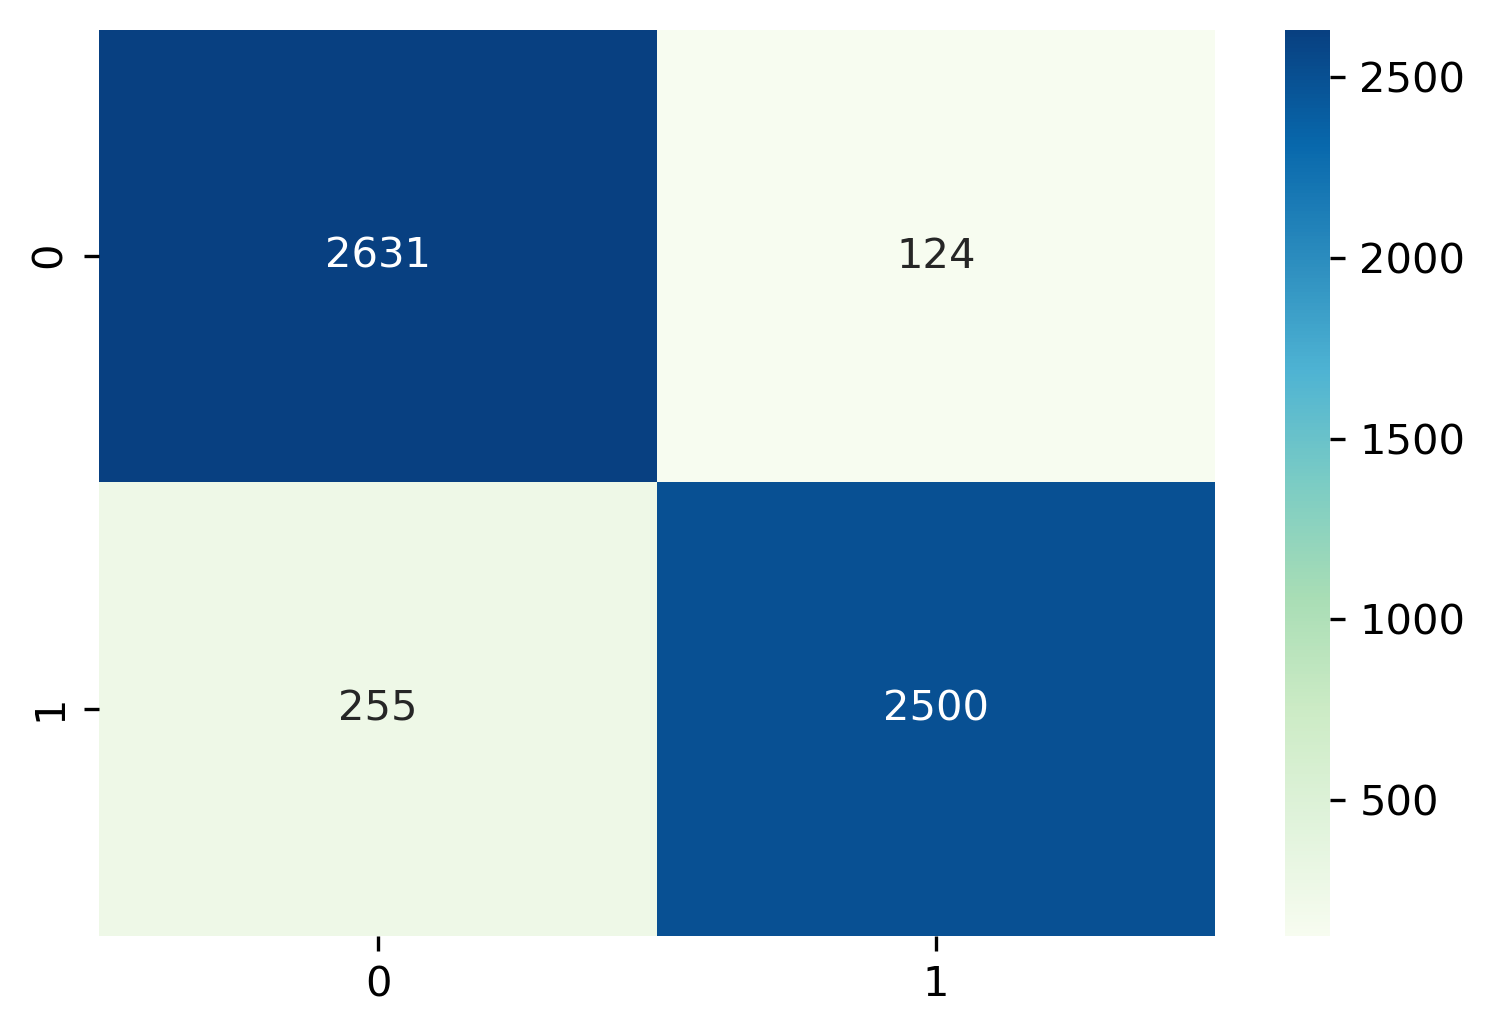

In [73]:
import seaborn as sns
cnf_vgg = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf_vgg, annot=True,fmt='g',cmap="GnBu")
plt.savefig("VGG-Confusion matrix.png")
plt.show()

# Specificity and sensitivity of VGG16

In [74]:
tp = 2631
fp = 124
tn = 2500 
fn = 255
sensitivity = tp/(tp+fn)
print(sensitivity)
specificity = tn/(tn+fp)
print(specificity)

0.9116424116424117
0.9527439024390244


In [2]:
import os
os.system('uname -o')

0

In [4]:
import sys
print(sys.platform)

linux
